In [4]:
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download: {response.status_code}")

In [8]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

download(file_path, "usedcars.csv")
file_name="usedcars.csv"

In [9]:
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [14]:
#creating Single LinearRegression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [15]:
X = df[['highway-mpg']]
Y = df['price']

In [16]:
lm.fit(X,Y)

LinearRegression()

In [17]:
#TO OBTAIN A PREDICTION
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [32]:
#To obtain value of intercept 
lm.intercept_

np.float64(38423.305858157386)

In [33]:
#To obtain value of slope
lm.coef_

array([-821.73337832])

In [34]:
#The final vales : Price = 38423.31 - 821.73 x highway-mpg


In [35]:
#Creating another linerregression relation
lm1= LinearRegression()
lm1

LinearRegression()

In [36]:
#Training model using engine size(independent)and price(dependent) varible
lm1.fit(df[["engine-size"]],df[["price"]])
lm1

LinearRegression()

In [37]:
#To find value of slope
lm1.coef_

array([[166.86001569]])

In [38]:
#To find value of intercept
lm1.intercept_

array([-7963.33890628])

In [39]:
#To find equation of predeicted line
yhat = -7963.34 + 166.86*X
Price = -7963.34 + 166.86*df['engine-size']

In [43]:
#Creating Multiple LinearRegression model

#Predictor variables
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [44]:
#Fitting linear model 
lm.fit(Z,df['price'])

LinearRegression()

In [45]:
#To find intercept
lm.intercept_

np.float64(-15806.624626329227)

In [46]:
#To find slope coefficients
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [48]:
#Final estimated model : Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [50]:
#Training another Multiple Linear Regression model, predictor value = normalized-losses & highway-mpg and response value = price 
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']], df['price'])


LinearRegression()

In [51]:
#To find coefficient
lm2.coef_

array([   1.49789586, -820.45434016])

In [52]:
#To find intercept
lm2.intercept_

np.float64(38201.313272457264)

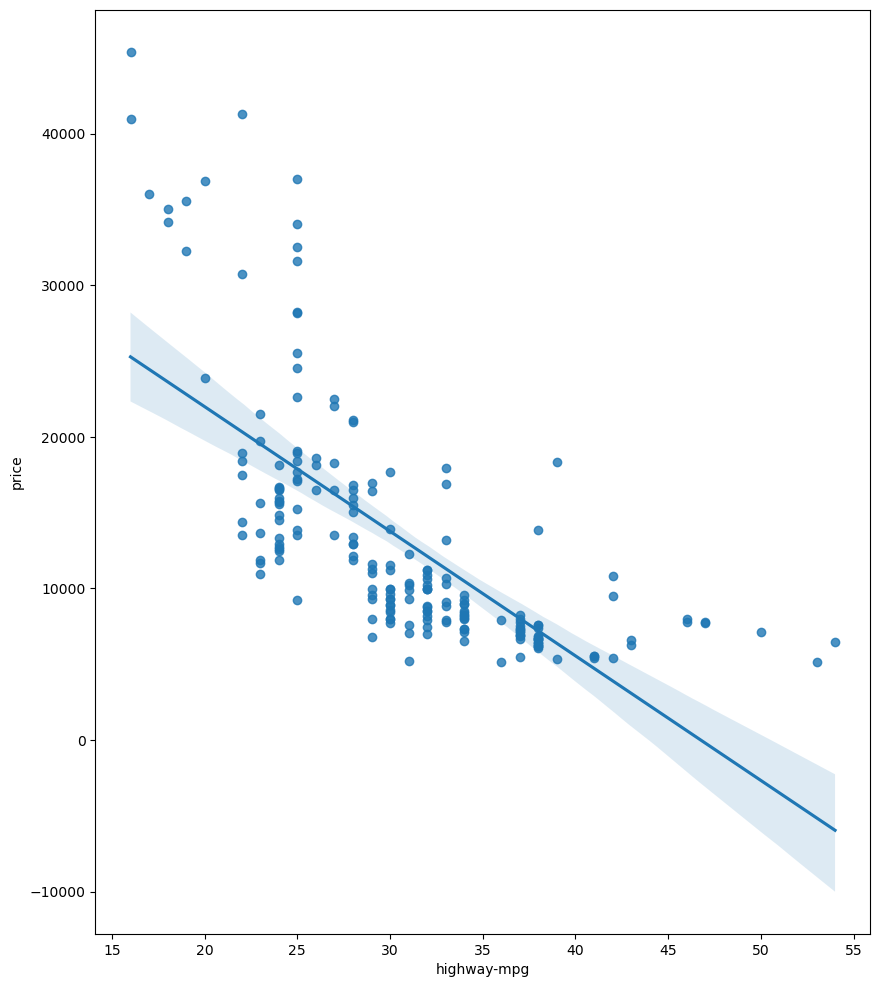

In [53]:
#Using Regression Plot to Visualize LinearRegression model
#Visualizing highway-mpg with predictor variable = price

width =12
height = 10
plt.figure(figsize=(height,width))
sns.regplot(x='highway-mpg', y="price", data = df)
plt.show()

#The graph shows negative coorelation 

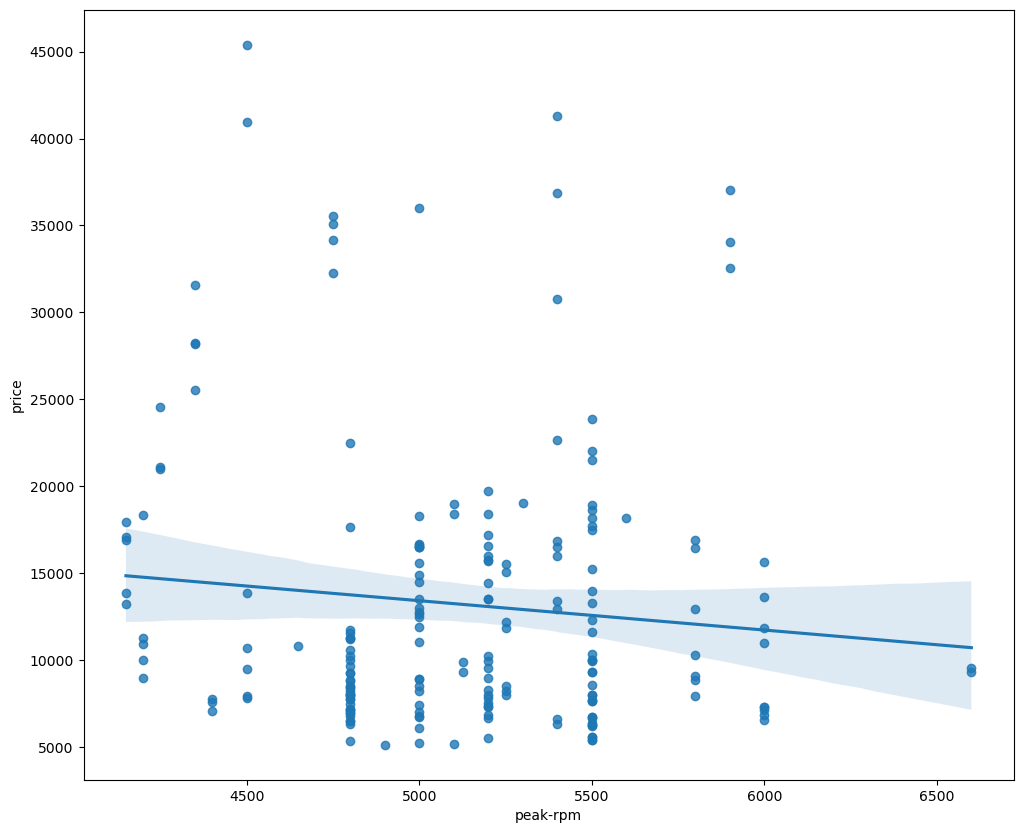

In [55]:
#Now we will compare regression plot of peak-rpm and price
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y="price", data = df)
plt.show()

#The graph shows that it is hard to determine if +ve or -ve correlation

In [56]:
#To check which factor is strongly correlated to Price using .corr()
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


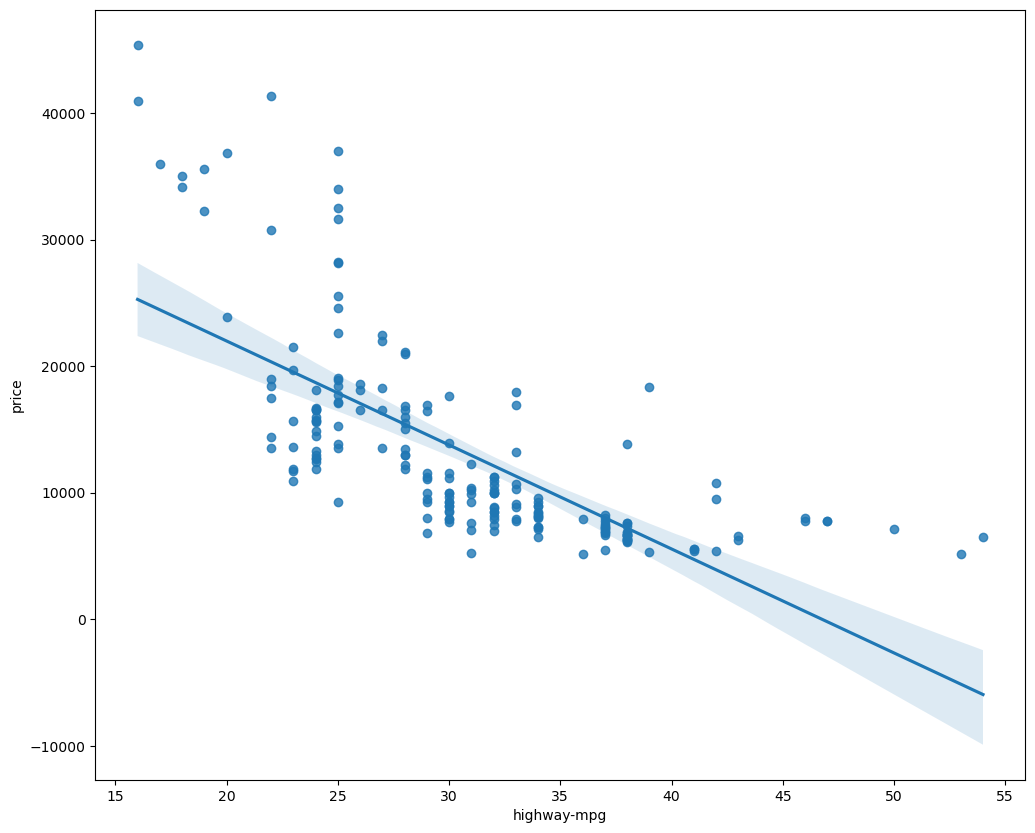

In [57]:
#Applying residual plot(Diff between predicted and observed value), if randomly spread out around x-axis = linear model correct

width = 12
height =10
plt.figure(figsize=(width, height))
sns.regplot(x = df['highway-mpg'], y=df['price'])
plt.show()

#Graph is not random so non-linear mode may be better for this data

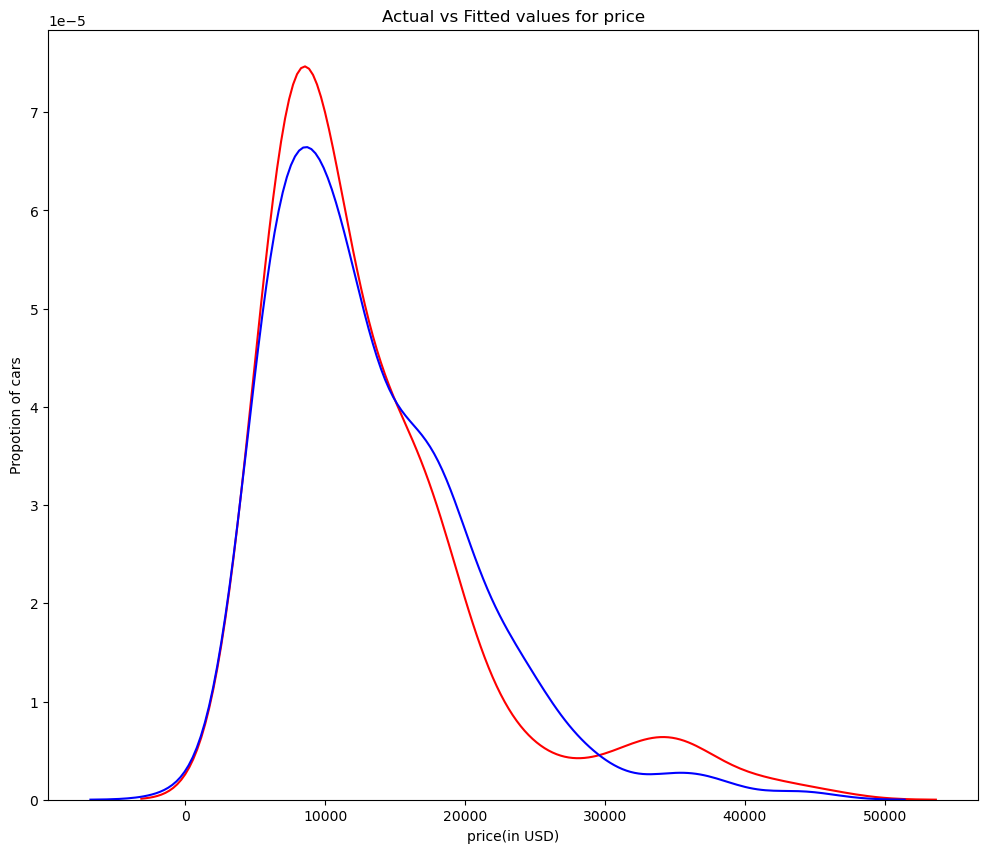

In [68]:
#Visualizing Multiple LinearRegression model
Y_hat = lm.predict(Z)

plt.figure(figsize=(width,height))
ax1 = sns.kdeplot(df['price'],  color = "r", label = "Actual Value")
sns.kdeplot(Y_hat, color ="b",label = "Fitted values", ax = ax1)

plt.title("Actual vs Fitted values for price")
plt.xlabel('price(in USD)')
plt.ylabel('Propotion of cars')

plt.show()
plt.close()


In [82]:
#Polynomial Regression(We get non linear relationships by squaring higher order terms of predictor variables) and Pipelines 
#2nd order , 3rd order etc..

#Plottign preivous highway-mpg vs price as it did not fit good in MLR

def PlotPolly(model,independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable,'.', x_new,y_new,'-')
    plt.title('Polynomidal Fit with matplotlib for price ~ length')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [83]:
x = df['highway-mpg']
y = df['price']

In [84]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


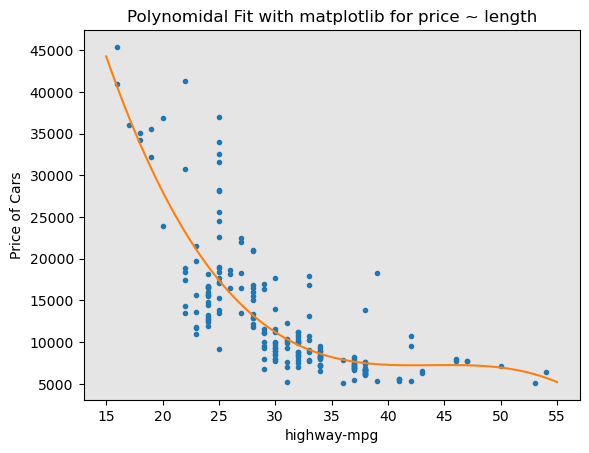

In [85]:
PlotPolly(p,x,y,'highway-mpg')

In [86]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


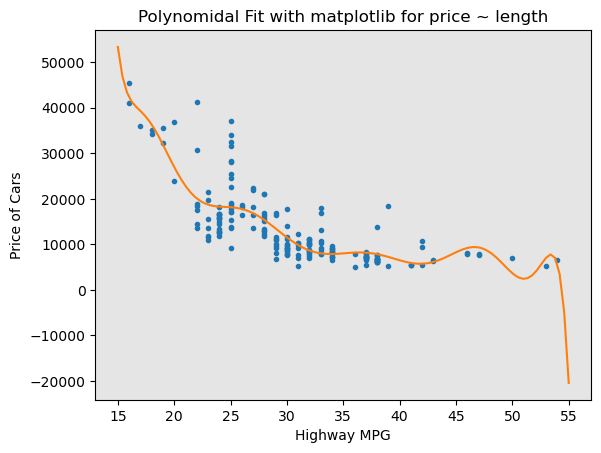

In [87]:
#Creating a 11 order polynomial with same variable x & y
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'Highway MPG')

In [88]:
#Performing polynomial transform
from sklearn.preprocessing import PolynomialFeatures

In [89]:
#Makinig polynomial of degree 2 
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [94]:
#Transforming polynomial
Z_pr=pr.fit_transform(Z)

In [95]:
#Before transformation (samples,features)
Z.shape

(201, 4)

In [93]:
#After transformation(samples,features)
Z_pr.shape

(201, 15)

In [96]:
#Pipelines - Simplify processing of data 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [98]:
#Creating a pipeline
Input =[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias= False)),('mode;', LinearRegression())]

In [100]:
pipe =Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('mode;', LinearRegression())])

In [101]:
#Tranforming and fitting simultaneously
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('mode;', LinearRegression())])

In [103]:
#Normalizing data, transforming and prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [104]:
#Creating another piepline that standardizes data & produce prediction using LRM using feature = Z ,target = y
Input2 = [("scale",StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
pipe[0:10]

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('mode;', LinearRegression())])

In [108]:
#Measuring In-Sample Evaluation(accuracy of model) using R^2 METHOD & MEAN SQUARED METHOD(MSE)

#Calculating R^2 of highway-mpg FOR SLR
lm.fit(X,Y)
print("The R-Square is:", lm.score(X,Y))

#We can say that ~49% variation of price is explained by SLR of horsepower-fit

The R-Square is: 0.4965911884339175


In [109]:
#Measuring MEAN_SQUARED_ERROR
Yhat= lm.predict(X)
print('The output of first four predicted value is:', Yhat[0:4])

The output of first four predicted value is: [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [111]:
from sklearn.metrics import mean_squared_error

In [114]:
#Comapring predicted result wit hactual results
mse = mean_squared_error(df['price'],Yhat)
print('The mean squared error of price and predicted value is :',mse)

The mean squared error of price and predicted value is : 31635042.944639895


In [115]:
#Calculating R^2 of highway-mpg FOR MLR

lm.fit(Z,df["price"])
print('The R-Square is:', lm.score(Z,df['price']))

#We can say that ~80% of the variation of price is explained by MLR of horsepower-fit

The R-Square is: 0.8093562806577457


In [117]:
#Calculating MEAN_SQUARED_ERROR
mean_squared_error(df['price'],p(x))

20474146.42636122

In [118]:
#To plot a prediction model using pyplot
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

new_input = np.arange(1,100,1).reshape(-1,1)


In [119]:
#Fit the model
lm.fit(X,Y)
lm

LinearRegression()

In [125]:
Yhat = lm.predict(new_input)
Yhat [0:5]

C:\Users\dhyan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

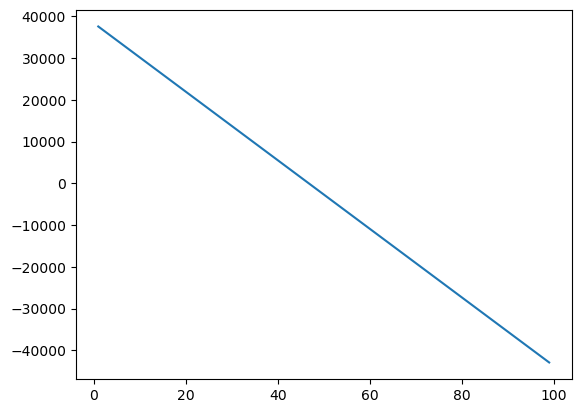

In [126]:
plt.plot(new_input,Yhat)
plt.show()

In [127]:
#A model with high R-SQUARED is better fit data
#Model with smallest MSE value is a better fit

# MSE of SLR = 3.16x10^7 while MLR has an MSE = 1.2 x10^7.
#The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).

#Comparing the R-SQUARED and MSE value we can conclude that MLR IS BETTER FOR OUR DATASET